# Run World3 model from 2003 equations
10 scenarios of The limits to Growth: the 30 years update, 2003. It's approximately the same, minor errors persists

In [2]:
from pydynamo import *
import matplotlib.pyplot as plt
%matplotlib inline

# 11 Scenarios Limits to growth

***

# Scenario 1

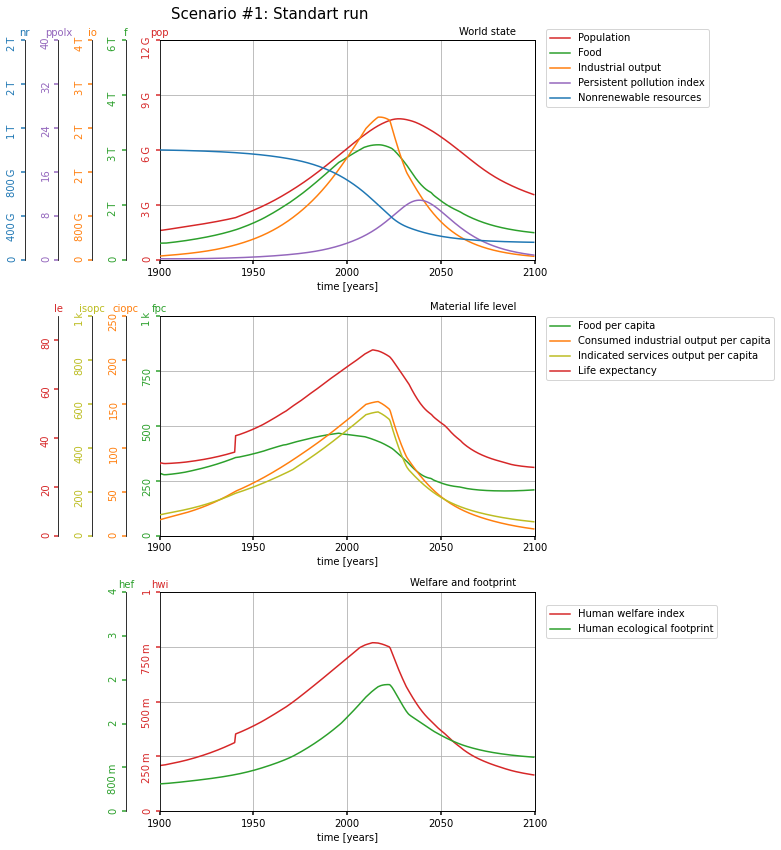

In [3]:
w = World3(1)
w.run()
w.plot_world(title='Scenario #1: Standart run')

Comme la dynamique principale du monde industrialisé est organisée autour de la boucle de rétroaction de l'industrie (_note: ajouter référence et explication_), on essaie d'expliquer le comportement de ce scénario en affichant l'évolution des variables influençant le produit industriel ***io***.

industrial output
io.k = ic.k*(1-fcaor.k)*cuf.k/icor.k


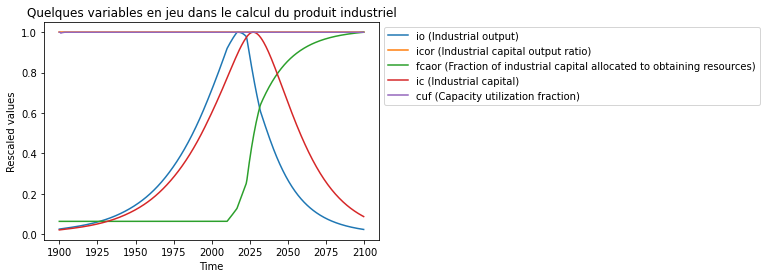

In [4]:
# Afficher la définition et l'équation de 'io'
print(w.definition('io'))
print(w.equation('io')) 
# Affichage des variables désirées, normalisé (rescale) entre 0 et 1, avec un titre
w.plot({'io', 'ic', 'fcaor', 'cuf', 'icor'}, rescale=True, title="Quelques variables en jeu dans le calcul du produit industriel") 

***io*** est calculé comme un produit de plusieurs variables. On  remarque alors que fcaor , la fraction de capital utilisé pour obtenir des resources (fraction of industrial capital allocated to obtaining resources), explose à partir de 2020, et que cela nuit au produit industriel total dans l'équation. Mais pourquoi ?

### Affichage et interprétation de fcaor1

fcaor1.k = NLF_fcaor1t(nrfr.k)
fraction of resources remaining


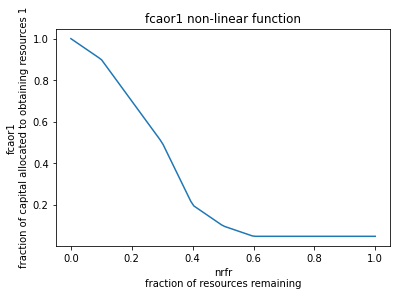

In [5]:
print(w.equation('fcaor1'))
print(w.definition('nrfr'))
w.plot_non_linearity('fcaor1')

En observant l'équation de la variable ***fcaor***, on peut voir qu'elle est calculée en fonction de ***nrfr***, le ratio des resources non renouvelables disponibles (**n**on **r**enewable **r**esources **f**raction **r**emaining). Sur le graphique, on observe que: 

- quand ***nrfr*** est faible, cela signifie que les resources non renouvelables sont rares, et donc plus coûteuses à extraire. Elles peuvent en effet être plus loin, plus profond, moins dense (comme le pétrole de schiste ou le cuivre), ce qui signifie qu'une énergie beaucoup plus grande va être nécessaire pour l'obtenir, comme on peut le voir dans le grapique ci dessous. Le capital à investir pour obtenir ces resources, ***fcaor*** va donc avoir tendance à prendre toute la place des investissements.


| Il faut beaucoup creuser pour extraire du cuivre dans certaines mines ! |
|:--:|
| ![boule de cuivre](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/boule_cuivre.jpeg) |


<!---
- source:
    - http://dillonmarsh.com/copper.html
-->

| Quantité d'énergie nécessaire à l'extraction de quelques minérais, en fonction de leur densité |
|:--:| 
| ![energyMetal](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/energy_metal_production.png) |


<!---
- source: 
    - ORE GRADE, METAL PRODUCTION, AND ENERGY
    - NORMAN J PAGE and S. C. CREASEY, Menlo Park, Calif.
    - Journal of Research of the U. S. Geological Survey, 1975, volume 3, issue 1 
    - https://pubs.usgs.gov/journal/1975/vol3issue1/report.pdf
-->

Comme vu sur le premier graphique, la quantité de resource non renouvelables décroit très vite. À un certain seuil, cela provoque une explosion du coût d'extraction des resources, et donc une forte baisse de la produciton industrielle. C'est à travers ce mécanisme que l'effondrement est provoqué dans ce premier scénario.


***

# Scenario 2
L'effondrement du premier scénario étant causé par une raréfaction des ressources, nous allons conjointement:
- supposer qu'il y a en fait deux fois plus de ressources initiales *nri* que prévu

In [6]:
w2 = World3(1)
w2.nri = 2e12 # More

- prévoir que grâce aux progrès de la technologie, à partir de 2002 (*fcaortm*), il sera plus facile d'extraire des ressources, et donc que la part de capital à allouer à leur extraction réduira. On baisse donc la table *fcaor2t*.

In [7]:
w2.fcaor2t = [1.0, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05] # More accessible
w2.fcaortm = 2002 # From 2002
w2.run()

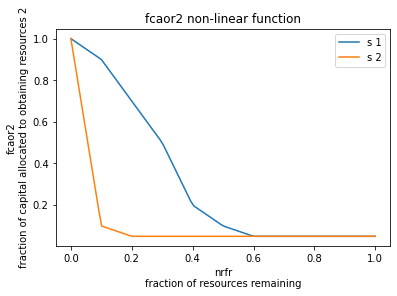

In [8]:
w2.plot_non_linearity('fcaor1')
w2.plot_non_linearity('fcaor2')
plt.legend(["s 1", "s 2"]);

In [9]:
w2.plot_world(title='Scenario #2: double -- and more accessible -- non-renewable resources ')

! lymap ne bouge pas !!!

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
w2.plot(['ppolx', 'lfd', 'lfert', 'ly'] , rescale=True)
plt.subplot(1, 3, 2)
w2.plot(['ly', 'fpc', 'fioaa'] , rescale=True)
plt.subplot(1, 3, 3)
w2.plot(['fioai', 'icir', 'ic', 'io'], rescale=True)

- La pollution dégrade la dertilité qui réduit les rendements agricoles
- Ainsi, la nourriture baisse et les investissements alloués à l'agriculture augmentent
- Cela fait baisser les investissements dans l'industrie au dessous du seuil critique, et enclenche donc la boucle de rétroaction d'effondrement de l'industrie


***

# Scenario 3
Nous allons donc enclencher la boucle d'action de la technologie sur la pollution à partir de 2002. Celle-ci est supposée permettre de trouver des technologies toujours plus puissantes permettant de réduire la pollution.

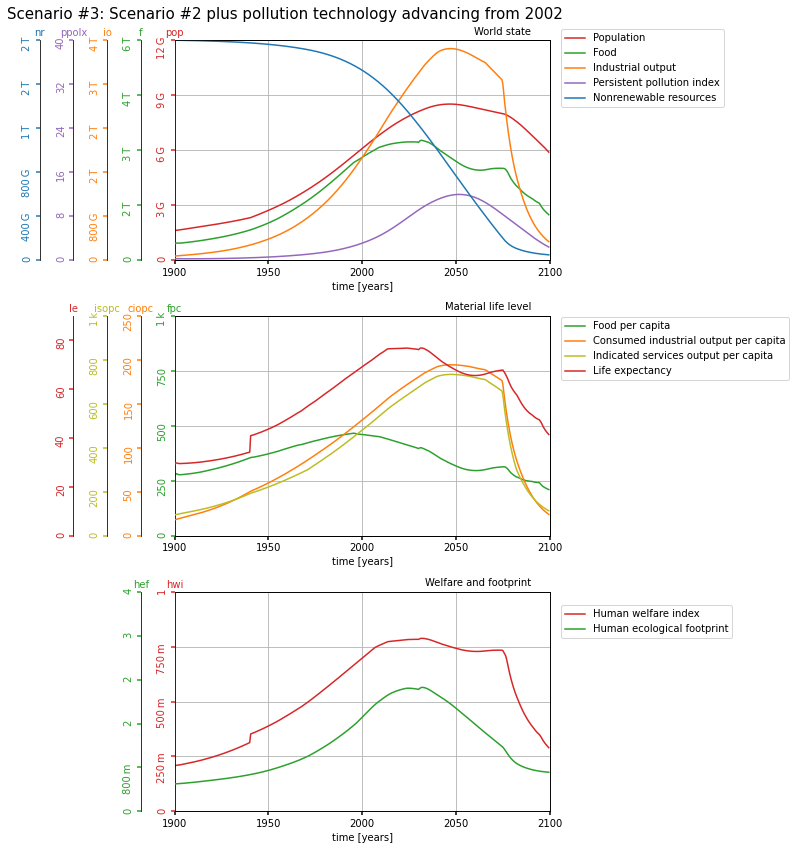

In [11]:
w3 = w2.copy()
w3.pptcmt = [-0.04, 0]
w3.pyear = 2002
w3.run(N=400, dt=0.5)
w3.plot_world(title='Scenario #3: Scenario #2 plus pollution technology advancing from 2002')

ppgr: persistent pollution generation rate
ppgr.k = (ppgio.k + ppgao.k)*ppgf.k


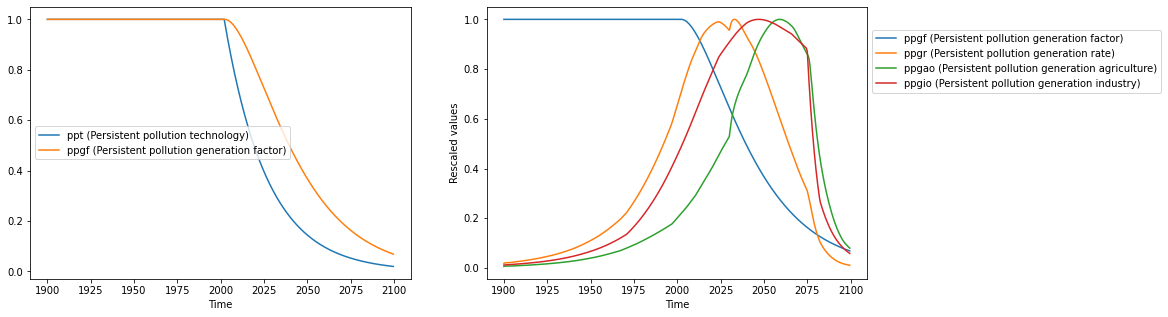

In [12]:
print('ppgr:', w3.definition('ppgr'))
print(w3.equation('ppgr'))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
w3.plot(['ppt', 'ppgf'])
plt.subplot(1, 2, 2)
w3.plot(['ppgf', 'ppgr', 'ppgao', 'ppgio'], rescale=True)

- la boucle d'amélioration technologique se déclenche, permettant de réduire exponentiellement le facteur de génération de pollution, avec un léger délai d'implantation de la technologie.
- ce facteur multiplie toute pollution émise, réduisant considérablement les pollutions engendrées

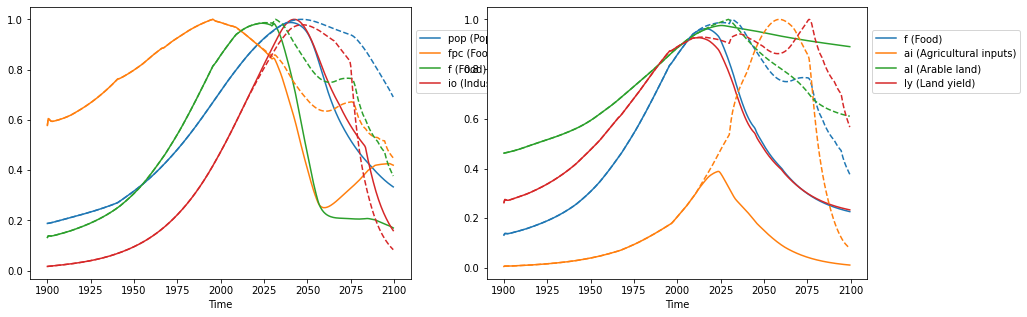

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
w2.plot_compare(w3, ['pop', 'fpc','f','io'] , rescale=True)
plt.subplot(1, 2, 2)
w.plot_compare(w3, ['f', 'ai', 'al', 'ly'] , rescale=True)

- Par rapport au scénario précédent, on a plus de population et de nourriture, mais au bout d'un moment la nourriture par personne comme à drastiquement baisser, ce qui provoque la même boucle d'effondrement
- La baisse de nourriture semble plus être causée par la baisse de terres cultivées que par la fertilité ou les intrants

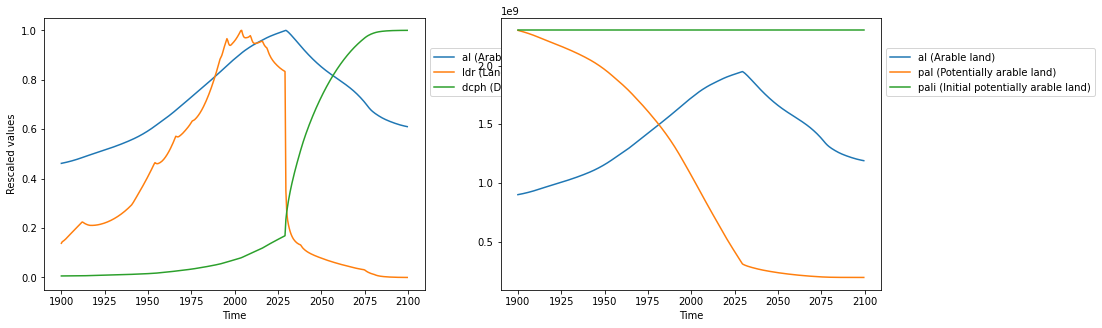

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
w3.plot(['al', 'ldr', 'dcph'], rescale=True)
plt.subplot(1, 2, 2)
w3.plot(['al', 'pal', 'pali'], rescale=False)

- En effet, on voit qu'aux environ de 2025, les terres cultivées baissent soudainement à cause la montée soudaine du coût de développement par hectare
- Cette augmentation de coût soudaine est causée par la raréfaction des terres potentiellement cultivables, qui sont toutes déjà occupées.

In [15]:
w3.plot_non_linearity('dcph')

On assiste donc ainsi dans ce scénario à l'atteinte de la troisième limite planétaire, la place disponible pour les cultures.

! FOOD TROP HAUT

# Scénario 4
On pourrait donc augmenter la productivité des terres agricoles grâce à la technologie, en enclanchant à partir de 2002 la boucle d'amélioration technologique de fertilité des terres.

In [16]:
w4 = w3.copy()
w4.lytcrmt = [0, 0.04]
w4.run(N=400, dt=0.5)
w4.plot_world(title='Scenario #4: Scenario #3 plus yield technology advancing from 2002')

! remontée de bouffe trop faible

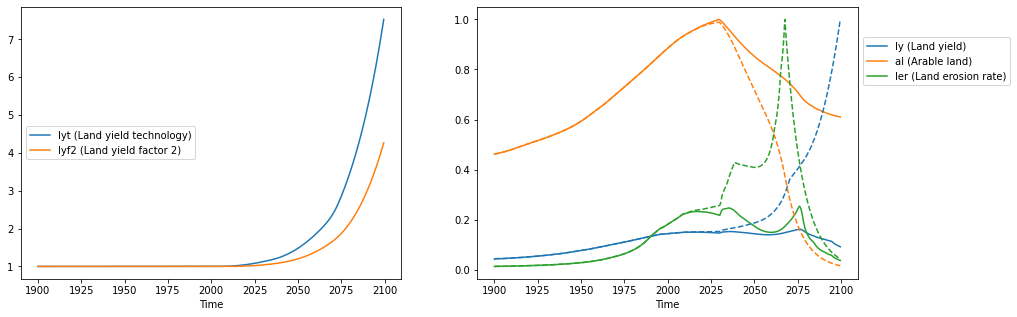

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
w4.plot(['lyt', 'lyf2'])
plt.subplot(1, 2, 2)
w3.plot_compare(w4, ['ly', 'al', 'ler'], rescale=True)

- On note l'effet tout à fait réaliste de l'amélioration exponentielle du facteur de rendement agricole grâce à la technologie dans ce scénario. 
- Malgré tout, cela ne suffit pas à compenser l'explosion de l'érosion des sols et provoquer une chute de la production de nourriture

# Scénario 5

Puisque c'est l'érosion qui pose alors problème, il est implémentons une politque d'empêchement de celle-ci.

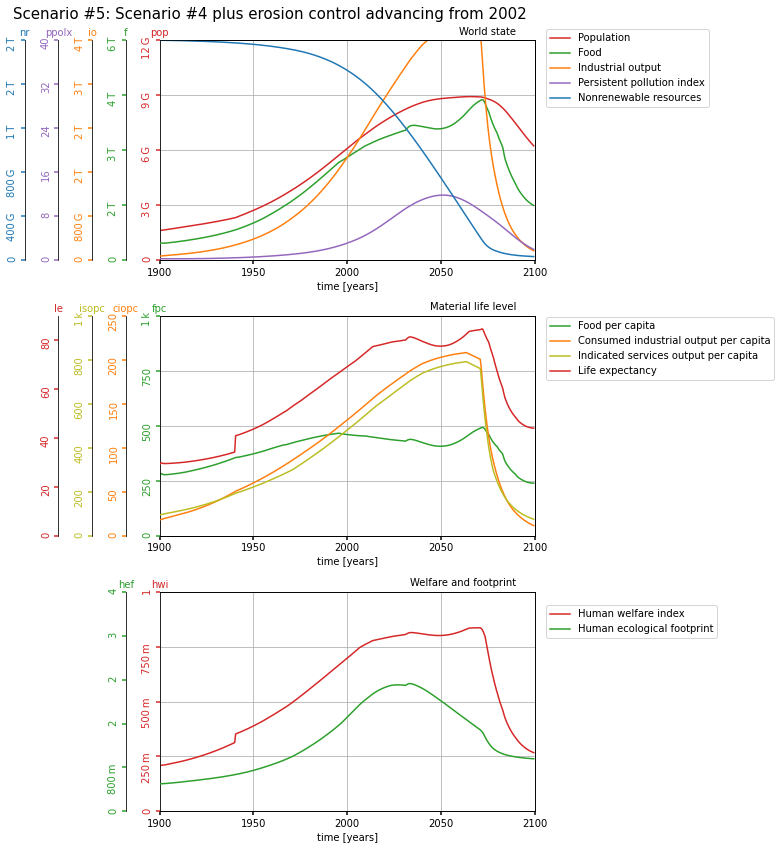

In [18]:
w5 = w4.copy()
w5.llmytm = 2002
w5.run(N=400, dt=0.5)
w5.plot_world(title='Scenario #5: Scenario #4 plus erosion control advancing from 2002')

Après la date *llymtm* d'application de la politique d'empêchement d'érosion des sols, les productions agricoles deviennent moins néfaste. Le modèle suppose que plus la productivité agricole augmente, plus la durée de vie des sols est réduite: cette réduction est modérée après *llmytm*.

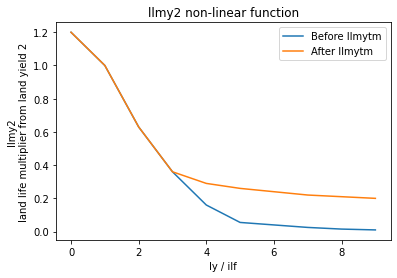

In [19]:
w5.plot_non_linearity('llmy1')
w5.plot_non_linearity('llmy2')
plt.legend(['Before llmytm', 'After llmytm']);

Tous ces changements on permis de retarder l'effondrement, mais celui-ci est tout de même provoqué à la fin du siècle, comme dans le scénario 1, avec l'épuisement visible des ressources non renouvelables.

# Scénario 6

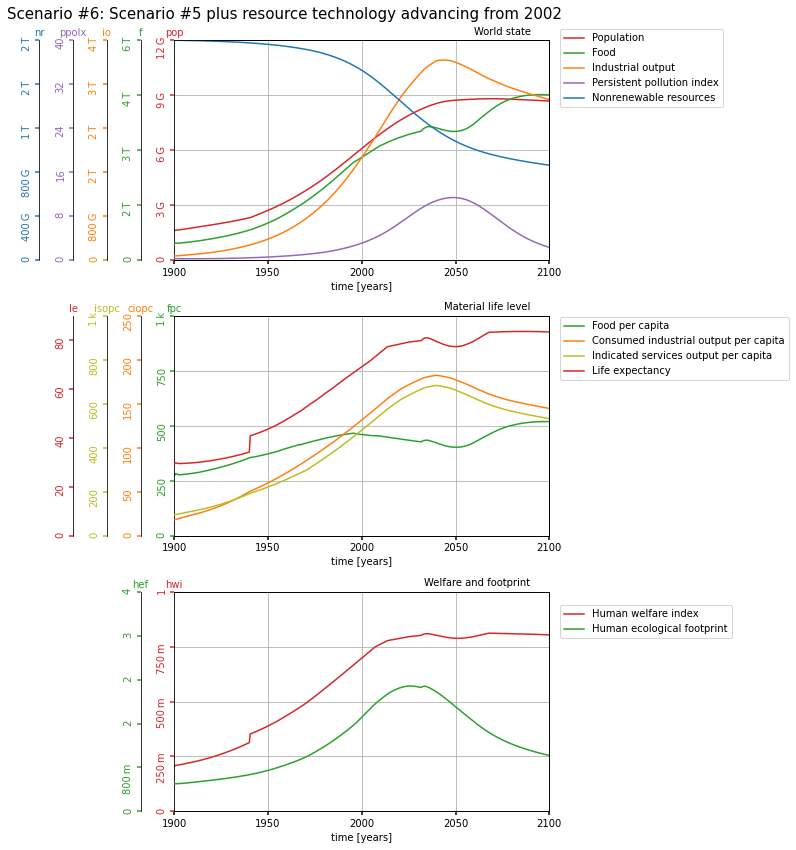

In [20]:
w6 = w5.copy()
w6.rtcmt = [0.04, 0.0]
w6.run(N=400, dt=0.5)
w6.plot_world(title='Scenario #6: Scenario #5 plus resource technology advancing from 2002')

On rajoute des technologies pour les ressources et on parvient à une stabilisation ! 

**Cependant**, il faut noter le réalisme des technologies adoptées:

Productivité agricole sans ajout d'intrants: Multipliée par 1.4
Productivité agricole totale: Multipliée par 1.7
Usage de ressources non renouvelable pour un même produit industriel: Divisé par 7.5
Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par 14.6
Durée de vie moyenne des cultures: Multipliée par 1.7


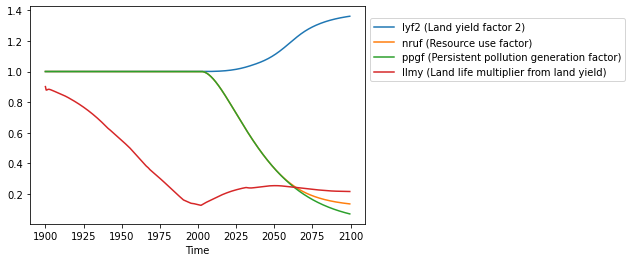

In [21]:
w6.plot(['lyf2', 'nruf', 'ppgf', 'llmy'])
print(f"Productivité agricole sans ajout d'intrants: Multipliée par {w6.get_at('lyf2', 2100)/w6.get_at('lyf2', 2002):0.1f}")
print(f"Productivité agricole totale: Multipliée par {w6.get_at('ly', 2100)/w6.get_at('ly', 2002):0.1f}")
print(f"Usage de ressources non renouvelable pour un même produit industriel: Divisé par {w6.get_at('nruf', 2002)/w6.get_at('nruf', 2100):0.1f}")
print(f"Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par {w6.get_at('ppgf', 2002)/w6.get_at('ppgf', 2100):0.1f}")
print(f"Durée de vie moyenne des cultures: Multipliée par {w6.get_at('llmy', 2100)/w6.get_at('llmy', 2002):0.1f}")

Ces progrès technologiques sont ... optimistes.

Et encore, ces améliorations ne se stabilisent que parce qu'il n'y en a plus besoin.

Les différentes boucles d'amélioration technologiques sont modélisées d'une manière similaire, qu'on peut illustrer avec celle des rendements agricoles:
- Le changement technologique se déclenche en fonction d'une certaine valeur, ici la différence entre le ratio de nouriture souhaité *drf* et réel *fr*
- Quand cette différence est supérieure à 0, et plus elle est élevée, plus le facteur rythme de changement technologique *lytcrm* augmente, comme sur la figure suivante
- Le développement technologique *lyt* suit alors une loi exponentielle: son augmentation est proportionnelle au rythme de changement *lytcr*, produit de *lyt* et de *lytcrm*
- Ces technologies se répercutent sur le facteur de rendement *lyf2* progressivement, avec un certain délai

On note que peu importe la situation (qui pourrait être une famine ou une paralysie de l'industrie), les technologies de rendements agricoles s'améliorent exponentiellement si la population a faim.

lytcrm.k = NLF_lytcrmt((drf - fr.k))
lytcr.k = clip(lyt.j*lytcrm.j,0, time.k, pyear)
lyt.k = lyt.j + dt*(lytcr.k)


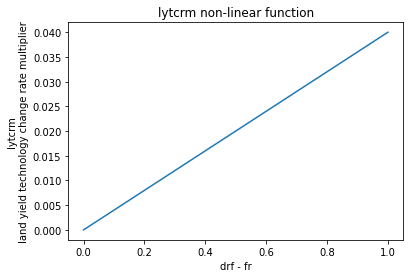

In [22]:
print(w6.equation('lytcrm'))
print(w6.equation('lytcr'))
print(w6.equation('lyt'))
w6.plot_non_linearity('lytcrm')

# Scénario 7

Puisque miser sur la technologie de cette façon parait risqué, d'autres solutions telles qu'une stabilisation de la population se sont proposées.

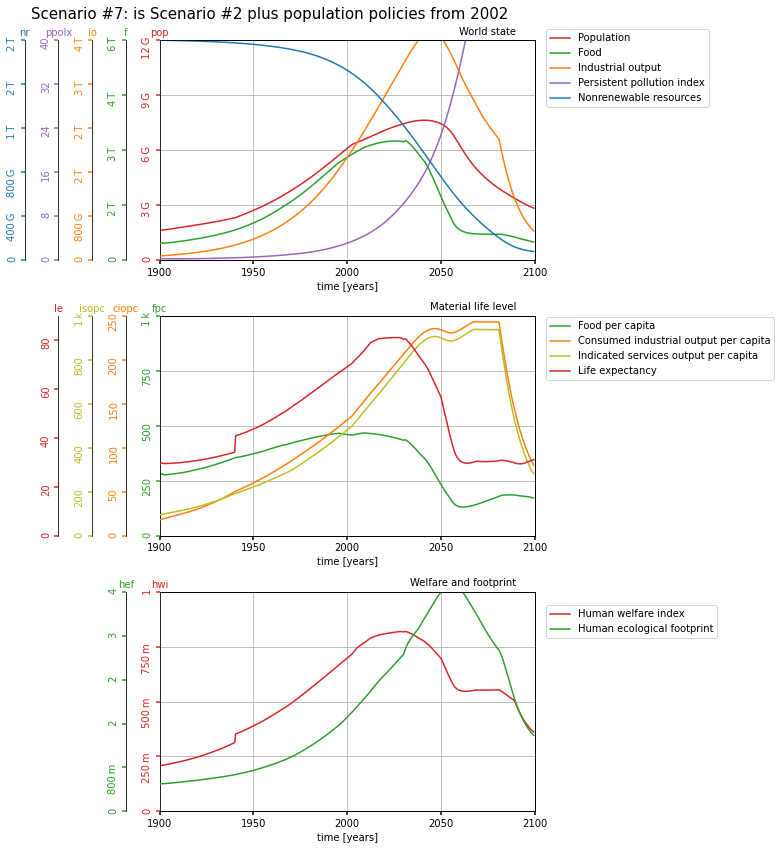

In [23]:
w7 = w2.copy()
w7.zpgt = 2002
w7.fcest = 2002
w7.run(N=400, dt=0.5)
w7.plot_world(title='Scenario #7: is Scenario #2 plus population policies from 2002')

In [24]:
print(w7.definition('zpgt'))
print(w7.definition('fcest'))

zero population growth time
fertility control effectiveness time


La taille de la famille désirée est fixée à 2 enfants et le contrôle de la fertilité devient parfait à partir de 2002.

On remarque à travers l'explosion de la pollution que cette mesure ne suffit pas ... serait-ce causé par les valeurs très élevées de production industrielle ? 

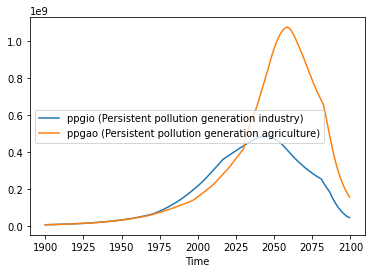

In [25]:
w7.plot(['ppgio', 'ppgao'])

# Scénario 8

On peut donc tenter de freiner la production industrielle, en limitant les besoins de la populaiton à ceux de 2002, et en prolongeant la durée de vie du capital (réparabilité, durabilité, etc.)

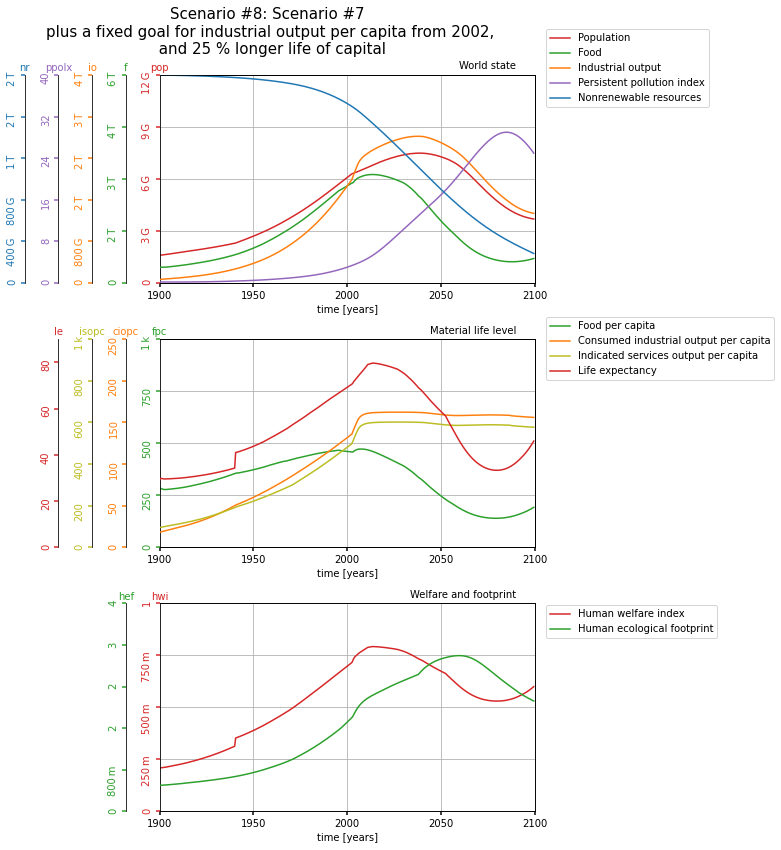

In [26]:
w8 = w7.copy()
w8.iopcd = 350
w8.iet  = 2002
w8.pyear = 2002
w8.alai2 = 2.5
w8.alic2 = 18
w8.alsc2 = 25
w8.run(N=400, dt=0.5)
w8.plot_world(title='Scenario #8: Scenario #7 \nplus a fixed goal for industrial output per capita from 2002,\n and 25 % longer life of capital')

Mais malgré ces limitations, la pollution augmente et les ressources s'épuisent un tantinet trop vite ... Cela ne suffit pas.

# Scénario 9

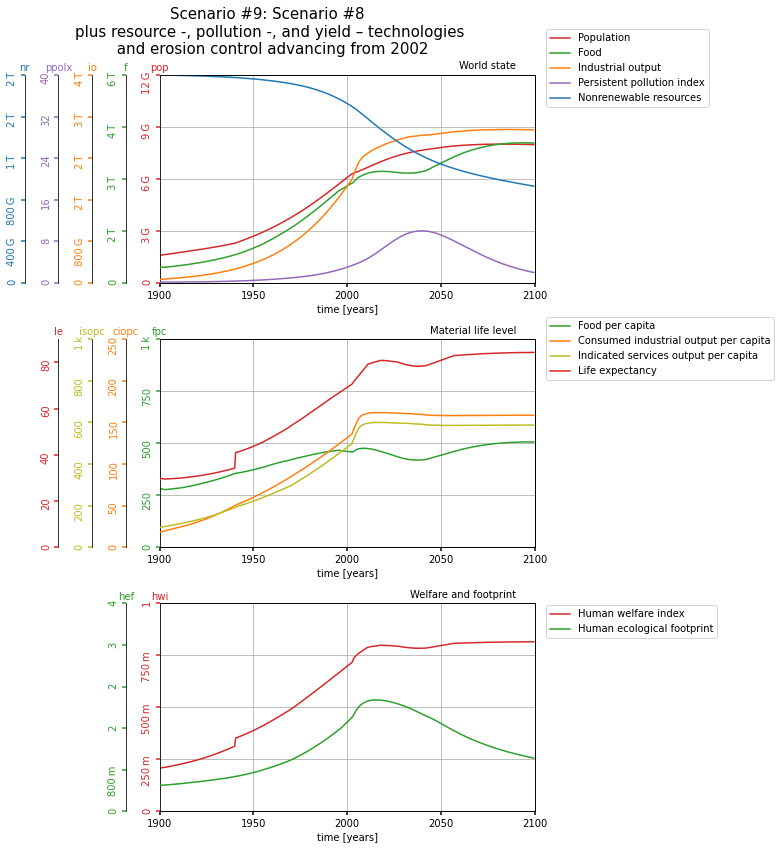

In [27]:
w9 = w8.copy()
w9.rtcmt = [0.04, 0.0]
w9.pptcmt = [-0.04, 0]
w9.lytcrmt = [0, 0.04]
w9.llmytm = 2002
w9.run(N=400, dt=0.5)
w9.plot_world(title='Scenario #9: Scenario #8 \nplus resource -, pollution -, and yield – technologies\n and erosion control advancing from 2002')

On ajoute donc toutes les technologies inclusent dans les scénarios précédents. On peut remarquer que cette fois-ci, elles ne nécessitent pas d'être aussi performantes ... enfin pour certaines.

Productivité agricole sans ajout d'intrants: Multipliée par 1.2 (contre 1.4)
Productivité agricole totale: Multipliée par 1.5 (contre 1.7)
Usage de ressources non renouvelable pour un même produit industriel: Divisé par 6.0 (contre 7.5 )
Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par 14.6 (contre 14.6)
Durée de vie moyenne des cultures: Multipliée par 1.8 (contre 1.7)


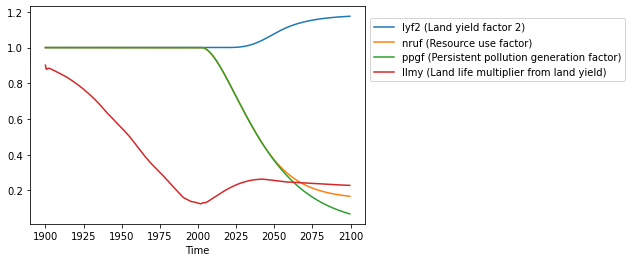

In [28]:
w9.plot(['lyf2', 'nruf', 'ppgf', 'llmy'])
print(f"Productivité agricole sans ajout d'intrants: Multipliée par {w9.get_at('lyf2', 2100)/w9.get_at('lyf2', 2002):0.1f} (contre {w6.get_at('lyf2', 2100)/w6.get_at('lyf2', 2002):0.1f})")
print(f"Productivité agricole totale: Multipliée par {w9.get_at('ly', 2100)/w9.get_at('ly', 2002):0.1f} (contre {w6.get_at('ly', 2100)/w6.get_at('ly', 2002):0.1f})")
print(f"Usage de ressources non renouvelable pour un même produit industriel: Divisé par {w9.get_at('nruf', 2002)/w9.get_at('nruf', 2100):0.1f} (contre {w6.get_at('nruf', 2002)/w6.get_at('nruf', 2100):0.1f} )")
print(f"Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par {w9.get_at('ppgf', 2002)/w9.get_at('ppgf', 2100):0.1f} (contre {w6.get_at('ppgf', 2002)/w6.get_at('ppgf', 2100):0.1f})")
print(f"Durée de vie moyenne des cultures: Multipliée par {w9.get_at('llmy', 2100)/w9.get_at('llmy', 2002):0.1f} (contre {w6.get_at('llmy', 2100)/w6.get_at('llmy', 2002):0.1f})")

# Scénario 10

Et si toutes ces mesures avaient été prises 20 ans plus tôt ?

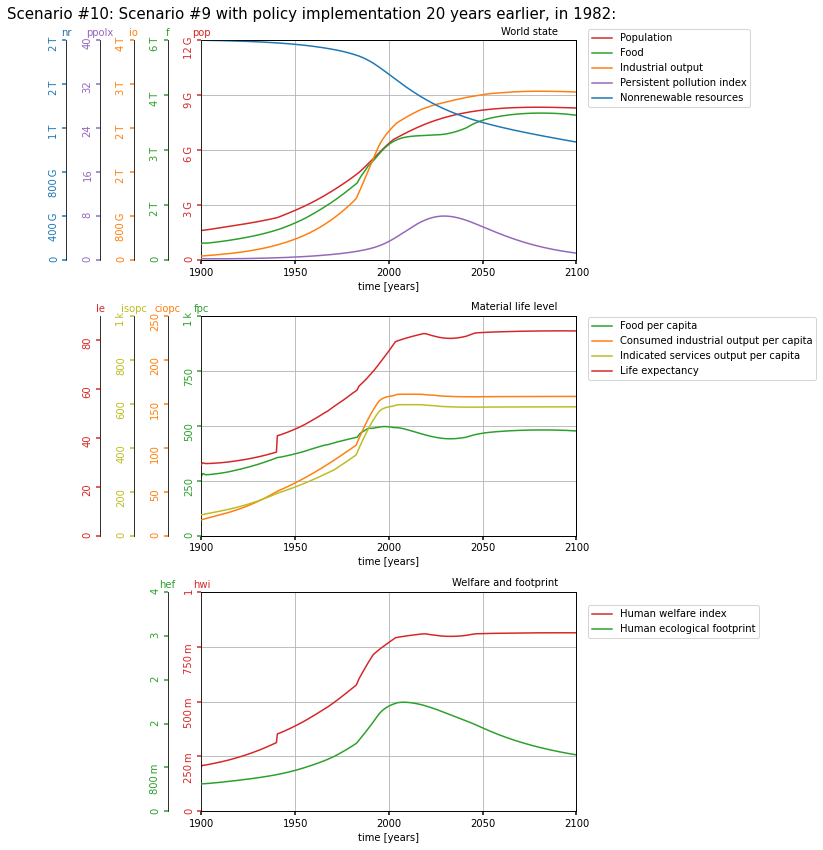

In [29]:
w10 = w9.copy()
w10.pyear = 1982
w10.llmytm = 1982
w10.iet  = 1982
w10.pyear = 1982
w10.run(N=400, dt=0.5)
w10.plot_world(title='Scenario #10: Scenario #9 with policy implementation 20 years earlier, in 1982:')

Productivité agricole sans ajout d'intrants: Multipliée par 1.1 (contre 1.2)
Productivité agricole totale: Multipliée par 1.3 (contre 1.5)
Usage de ressources non renouvelable pour un même produit industriel: Divisé par 5.4 (contre 6.0 )
Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par 20.5 (contre 14.6)
Durée de vie moyenne des cultures: Multipliée par 1.1 (contre 1.8)


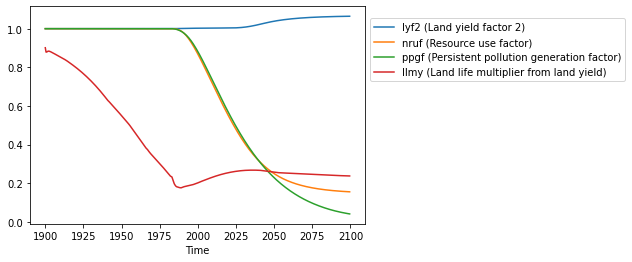

In [30]:
w10.plot(['lyf2', 'nruf', 'ppgf', 'llmy'])
print(f"Productivité agricole sans ajout d'intrants: Multipliée par {w10.get_at('lyf2', 2100)/w10.get_at('lyf2', 2002):0.1f} (contre {w9.get_at('lyf2', 2100)/w9.get_at('lyf2', 2002):0.1f})")
print(f"Productivité agricole totale: Multipliée par {w10.get_at('ly', 2100)/w10.get_at('ly', 2002):0.1f} (contre {w9.get_at('ly', 2100)/w9.get_at('ly', 2002):0.1f})")
print(f"Usage de ressources non renouvelable pour un même produit industriel: Divisé par {w10.get_at('nruf', 2002)/w10.get_at('nruf', 2100):0.1f} (contre {w9.get_at('nruf', 2002)/w9.get_at('nruf', 2100):0.1f} )")
print(f"Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par {w10.get_at('ppgf', 2002)/w10.get_at('ppgf', 2100):0.1f} (contre {w9.get_at('ppgf', 2002)/w9.get_at('ppgf', 2100):0.1f})")
print(f"Durée de vie moyenne des cultures: Multipliée par {w10.get_at('llmy', 2100)/w10.get_at('llmy', 2002):0.1f} (contre {w9.get_at('llmy', 2100)/w9.get_at('llmy', 2002):0.1f})")

L'amélioration technologique nécessaire à une stabilisation heureuse est cette fois bien inférieure ! En effet, la pollution et l'érosion s'étant moins accumulées, il est plus facile de limiter l'impact écologique. 

# Scénario 11

Et si toutes ces mesures étaient prises 20 ans plus tard ? C'est à dire en 2022, aujourd'hui

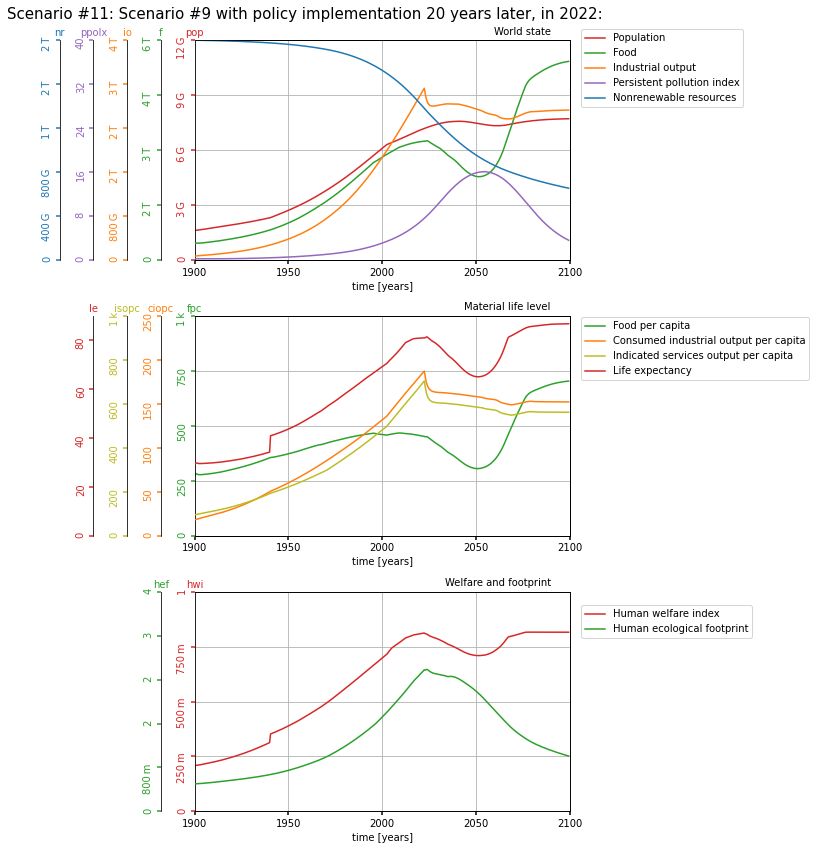

In [31]:
w11 = w9.copy()
w11.pyear = 2022
w11.llmytm = 2022
w11.iet  = 2022
w11.pyear = 2022
w11.run(N=400, dt=0.5)
w11.plot_world(title='Scenario #11: Scenario #9 with policy implementation 20 years later, in 2022:')

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
w11.plot(['lyf2', 'nruf', 'ppgf', 'llmy'])
plt.subplot(1, 2, 2)
w9.plot_compare(w11, ['nrur', 'ppgf', 'fr'], rescale=True)
print(f"Productivité agricole sans ajout d'intrants: Multipliée par {w11.get_at('lyf2', 2100)/w11.get_at('lyf2', 2002):0.1f} (contre {w9.get_at('lyf2', 2100)/w9.get_at('lyf2', 2002):0.1f})")
print(f"Productivité agricole totale: Multipliée par {w11.get_at('ly', 2100)/w11.get_at('ly', 2002):0.1f} (contre {w9.get_at('ly', 2100)/w9.get_at('ly', 2002):0.1f})")
print(f"Usage de ressources non renouvelable pour un même produit industriel: Divisé par {w11.get_at('nruf', 2002)/w11.get_at('nruf', 2100):0.1f} (contre {w9.get_at('nruf', 2002)/w9.get_at('nruf', 2100):0.1f} )")
print(f"Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par {w11.get_at('ppgf', 2002)/w11.get_at('ppgf', 2100):0.1f} (contre {w9.get_at('ppgf', 2002)/w9.get_at('ppgf', 2100):0.1f})")
print(f"Durée de vie moyenne des cultures: Multipliée par {w11.get_at('llmy', 2100)/w11.get_at('llmy', 2002):0.1f} (contre {w9.get_at('llmy', 2100)/w9.get_at('llmy', 2002):0.1f})")

Productivité agricole sans ajout d'intrants: Multipliée par 2.0 (contre 1.2)
Productivité agricole totale: Multipliée par 2.2 (contre 1.5)
Usage de ressources non renouvelable pour un même produit industriel: Divisé par 4.6 (contre 6.0 )
Pollution générée par l'agriculture ou l'industrie pour une même production: Divisée par 7.2 (contre 14.6)
Durée de vie moyenne des cultures: Multipliée par 1.6 (contre 1.8)


La pollution atteint dans le scénario 11 un pic beaucoup plus élevé, ce qui réduit la fertilité, et une grande amélioration technologique des rendements est alors nécessaire en réaction à la baisse du ratio de nourriture. De plus, le retard dans les décisions font que les technologies d'usage des ressources et de pollution mettent plus de temps à apparaitre, ce qui explique leur amélioration moins flagrante. Mais comme le rythme d'usage des ressources est encore élevé, et risque la raréfaction, des améliorations devront se manifester un peu plus tard.

On note aussi un temps de réduction de l'index du niveau de vie, ce qui peut être interprêté comme un temps de crise, qui n'était pas présent précedemment.

Ces deux derniers scénarios illustrent que la date à laquelle les changements de politique sont effectués est cruciale, qu'un retard provoque des phénomènes différents qu'une avance, principalement:
- Que les améliorations technologiques devront être plus élevées
- Ou alors que les standarts industriels de niveau de vie devront réduire
- Que des temps de crises seront traversés